## <l style= "color:SkyBlue"> **Volvieron los P :v**</l> 
---

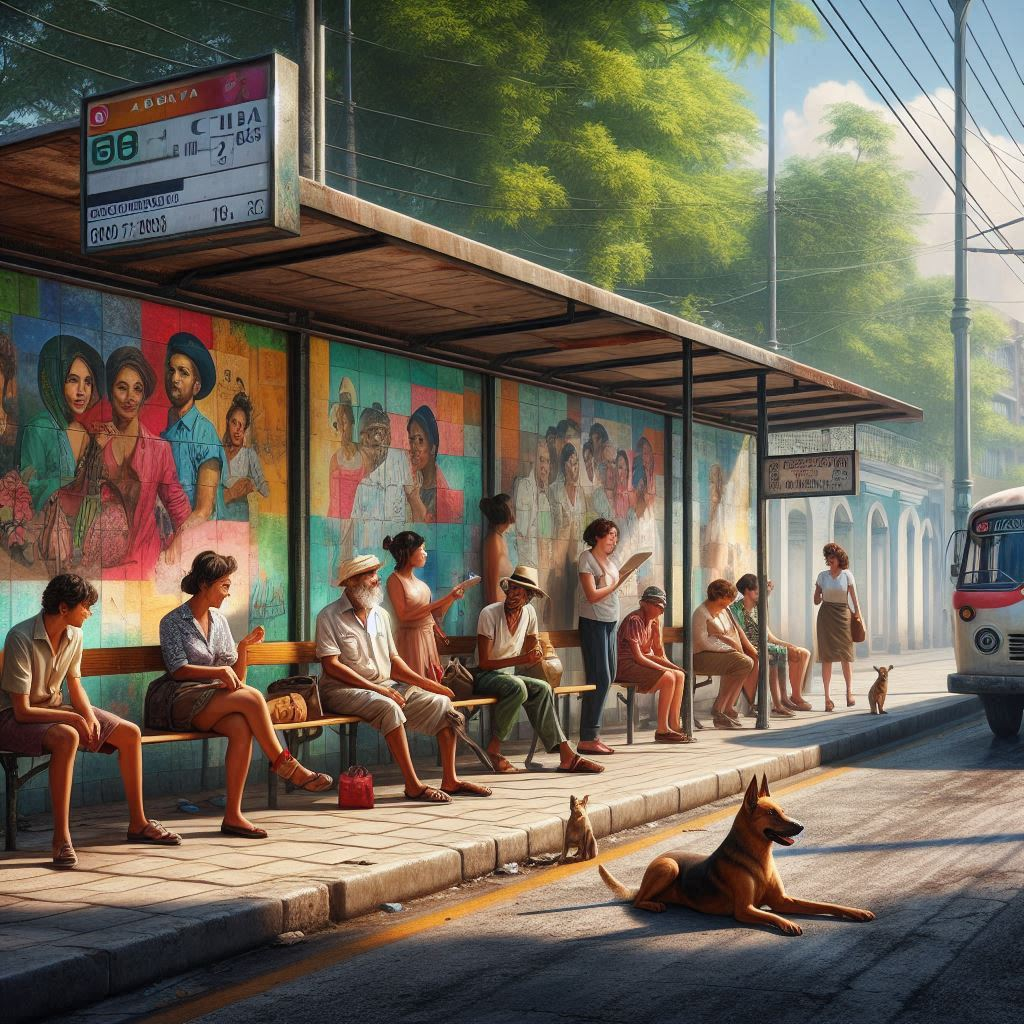>

---

Eres un programador designado a resolver el problema del `transporte en cuba` :0 para ello tienes que completar varias tareas. Has olvidado como crear listas de <l style="color:blue">Python</l> y has olvidado como usar un import :'D

En primer lugar, deberás `procesar` la información de las rutas de las guaguas, te hace falta crear un `objeto` donde *organices las conexiones que existen entre las paradas*, pero solo tienes las *rutas* de las guaguas en formato de `string`, crea un objeto que se use de la siguiente manera:

```python
rutas_string = "P1: ParadaA, ParadaB, ParadaC, ParadaD. P2: ParadaC, ParadaE, ParadaF, ParadaG. P3: ParadaD, ParadaH, ParadaI, ParadaJ. P4: ParadaB, ParadaK, ParadaL, ParadaM. P5: ParadaF, ParadaN, ParadaO, ParadaP"
```

el objeto que devuelva `organizador_rutas` debe permitir imprimir todas las paradas que existen en el sistema, todas las guaguas registradas, y para una parada cuales son las paradas adyacentes a las que se podria acceder desde ella tomando alguna guagua que pase por ahi


```python
o_rutas = organizador_rutas(rutas_string)
o_rutas.paradas() -> "ParadaA, ParadaB, ParadaC..."
o_rutas.guaguas() -> "P1, P2, P3..."
o_rutas.paradas_desde("ParadaB") -> "ParadaA, ParadaC, ParadaK"
```

In [356]:
class Node():
    def __init__(self, data=None, next=None, prev=None):
        self.data = data
        self.next = next
        self.prev = prev
        self.index = None

class List():
    def __init__(self):
        self.head = None
        self.index = 0
    
    def add(self, data):
        if self.head == None:
            self.head = Node(data = data, next = self.head)
            self.head.index = self.index
        else:
            current = self.head
            while current.next is not None:
                current = current.next
            self.index += 1
            current.next = Node(data=data, next = None, prev=current)
            current.next.index = self.index

    def delete(self, key = None):
        curr = self.head
        if key is not None:
            while curr and curr.data != key:
                curr = curr.next
        elif key is None:
            while curr and curr.next !=None:
                curr.prev = curr
                curr = curr.next
        if curr.prev is None:
            self.head = curr.next
            self.head.prev = None
        else:
            curr.prev.next = curr.next
            if curr.next is not None:
                curr.next.prev = curr.prev
                temp = curr
                while temp.next is not None:
                    temp.next.index -=1
                    temp = temp.next
            self.index -= 1
            curr.next = None
            curr.prev = None
            curr = None
    
    @property
    def isempty(self):
        return self.head == None
    
    @property
    def get_end(self):
        temp = self.head
        while temp is not None and temp.next is not None:
            temp = temp.next
        return temp
    
    def __repr__(self):
        if self.head != None:
            string = str(self.head.data)
            current = self.head
            while current.next is not None:
                string += ", " + str(current.next.data)
                current = current.next
            return string
        return "None"
    
    def __getitem__(self, index):
        if isinstance(index, int):
            if index >= 0:
                if self.head is None:
                    return None
                current = self.head
                while current is not None:
                    if current.index == index:
                        return current
                    current = current.next
                raise IndexError("Indice fuera de rango")  
            if index < 0:
                if self.head is None:
                    return None
                index = self.index + (index + 1)
                current = self.head
                while current is not None:
                    if current.index == index:
                        return current
                    current = current.next
                raise IndexError("Indice fuera de rango")
    
    def __len__(self):
        count = 0
        if self.head != None:
            current = self.head
            while current is not None:
                current = current.next
                count+=1
        return count
    
    def intersection(self, other):
        intersect = set()
        for i in self:
            for j in other:
                if i.data == j.data:
                    intersect.add(i.data)
        return False if len(intersect) == 0 else intersect
    
    def inside(self,data):
        current = self.head
        while current is not None:
            if current.data == data:
                return True
            current = current.next
        return False 

In [357]:
class organizador_rutas():
    def __init__(self, string):
        self.string = string.replace(" ", "").split(".")
        for i in range(len(self.string)):
            self.string[i] = self.string[i].split(":")

        self.rutas = {}
        for i in range(len(self.string)):
            self.string[i][1] = self.string[i][1].split(",")
            lista_paradas = List()
            for j in self.string[i][1]:
                lista_paradas.add(j)
            self.string[i][1] = lista_paradas
        for i in self.string:
            self.rutas[i[0]] = i[1]
    
    def guaguas(self):
        string = ""
        for i in self.rutas:
            string += str(i) + ", "
        string = string[:-2]
        return string
    
    def paradas(self):
        string = ""
        for i in self.rutas:
            for j in self.rutas[i]:
                string += str(j.data) + ", "
        string = string[:-2]
        return string
    
    def paradas_desde(self, parada):
        adyacentes = List()
        for i in self.rutas:
            for j in self.rutas[i]:
                if parada == j.data:
                    if j.prev is not None:
                        adyacentes.add(j.prev.data)
                    if j.next is not None:
                        adyacentes.add(j.next.data)
        print(adyacentes)
        
rutas_string = "P1: ParadaA, ParadaB, ParadaC, ParadaD. P2: ParadaC, ParadaE, ParadaF, ParadaG. P3: ParadaD, ParadaH, ParadaI, ParadaJ. P4: ParadaB, ParadaK, ParadaL, ParadaM. P5: ParadaF, ParadaN, ParadaO, ParadaP"
o_rutas = organizador_rutas(rutas_string)
print(o_rutas.guaguas())
print(o_rutas.paradas())
o_rutas.paradas_desde("ParadaB")

P1, P2, P3, P4, P5
ParadaA, ParadaB, ParadaC, ParadaD, ParadaC, ParadaE, ParadaF, ParadaG, ParadaD, ParadaH, ParadaI, ParadaJ, ParadaB, ParadaK, ParadaL, ParadaM, ParadaF, ParadaN, ParadaO, ParadaP
ParadaA, ParadaC, ParadaK


##### Implementa además otro metodo para *organizar las colas en una parada*, debes crear un objeto `organizador_parada`, este objeto se crea con el nombre de la parada y debe manejar el correcto funcionamiento de esta:

- Cuando llegue un pasajero a hacer la cola se llamará un metodo `ultima_persona` para insertarlo en el sistema con las guaguas que este pasajero esta esperando, ademas se guardará el nombre del pasajero. 
- Tambien este objeto tendrá que contar con un metodo `muestra_cola` para imprimir el estado actual de la cola para una guagua especifica...
- Asi como un metodo `llega_guagua`, que recibirá la guagua que acaba de llegar y cuantas personas pueden subir, este metodo debe sacar de la cola a los pasajeros que hayan marcado para esta guagua en orden de llegada hasta que se completen las capacidades vacias de esta e imprimir los pasajeros que se acaban de ir


```python
o_parada = organizador_parada("ParadaC")

o_parada.ultimo("Alan", ["P1", "P2"])
o_parada.ultimo("Marikusa", ["P1"])
o_parada.ultimo("Rachel", ["P2"])
o_parada.ultimo("Fred", ["P1"])

o_parada.muestra_cola("P1") -> Alan, Marikusa, Fred

o_parada.llega_guagua("P1", 2) -> Alan, Marikusa se acaban de ir en el P1

o_parada.muestra_cola("P1") -> Fred

```


##### Además de lo anterior se quiere implementar un servicio para los usuarios `premium`, estos usuarios quieren desde un `organizador de paradas` poder saber que ruta de guaguas deben coger para llegar a una parada dada, para ello agregue:

- otro método a su objeto donde reciba una parada 
- y un organizador de rutas y devuelva la ruta de guaguas que debe coger hasta que parada para llegar a su destino.


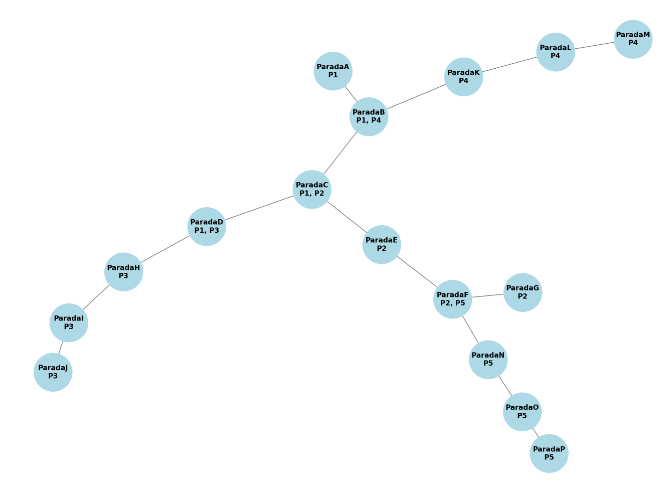

Por ejemplo para el caso planteado, si un usuario está en la `parada J` y quiere llegar hasta la `parada L` deberia coger el `P3 hasta la ParadaD`, ahí bajarse y coger el `P1 hasta la ParadaB` y ahí bajarse y coger el `P4 hasta la ParadaL`

```python
o_parada = organizador_parada("ParadaJ")
o_parada.encontrar_ruta("ParadaL", o_rutas) 
    -> P3 hasta ParadaD, P1 hasta ParadaB, P4 hasta ParadaL
```

In [358]:
class Parada():
    def __init__(self, nombre):
        self.nombre = nombre
        self.guaguas = List()

    def add(self,guagua):
        self.guaguas.add(guagua)

    def paradas(self):
        print(self.guaguas)
    
    def __repr__(self):
        return self.nombre

class Rutas_Premium():
    def __init__(self):
        self.grafo = {}
    
    def __str__(self):
        return str(self.grafo)
    
    def grafo_return(self):
        return self.grafo
    
    def agregar_parada(self, parada):
        if parada not in self.grafo:
            self.grafo[parada.nombre] = List()
        else:
            raise ValueError("La parada ya se encuentra en el grafo")
        
    def agregar_conexion(self, parada, conexion):
        if parada.nombre in self.grafo:
            if self.grafo[parada.nombre].head is not None:
                for i in self.grafo[parada.nombre]:
                    if i == conexion:
                        pass
            if parada.guaguas.intersection(conexion.guaguas) != False:
                self.grafo[parada.nombre].add((conexion.nombre, conexion.guaguas))
                self.grafo[conexion.nombre].add((parada.nombre, parada.guaguas))

                        

ParadaA = Parada("ParadaA")    
ParadaA.add("P1")  
ParadaB = Parada("ParadaB")    
ParadaB.add("P1")
ParadaB.add("P4")
ParadaC = Parada("ParadaC")    
ParadaC.add("P1")
ParadaC.add("P2")
ParadaD = Parada("ParadaD")    
ParadaD.add("P1")
ParadaD.add("P3")
ParadaE = Parada("ParadaE")    
ParadaE.add("P2")
ParadaF = Parada("ParadaF")    
ParadaF.add("P2")
ParadaF.add("P5")
ParadaG = Parada("ParadaG")   
ParadaG.add("P2")
ParadaH = Parada("ParadaH")    
ParadaH.add("P3")
ParadaI = Parada("ParadaI")    
ParadaI.add("P3")
ParadaJ = Parada("ParadaJ")    
ParadaJ.add("P3")
ParadaK = Parada("ParadaK")    
ParadaK.add("P4")
ParadaL = Parada("ParadaL")    
ParadaL.add("P4")
ParadaM = Parada("ParadaM")    
ParadaM.add("P4")
ParadaN = Parada("ParadaN")    
ParadaN.add("P5")
ParadaO = Parada("ParadaO")    
ParadaO.add("P5")
ParadaP = Parada("ParadaP")    
ParadaP.add("P5")

o_ruta = Rutas_Premium()
paradas = (ParadaA,ParadaB,ParadaC,ParadaD,ParadaE,ParadaF,ParadaG,ParadaH,ParadaI,ParadaJ,ParadaK,ParadaL,ParadaM,ParadaN,ParadaO,ParadaP)
for i in paradas:
    o_ruta.agregar_parada(i)
o_ruta.agregar_conexion(ParadaA, ParadaB)
o_ruta.agregar_conexion(ParadaB, ParadaC)
o_ruta.agregar_conexion(ParadaB, ParadaK)
o_ruta.agregar_conexion(ParadaC, ParadaE)
o_ruta.agregar_conexion(ParadaC, ParadaD)
o_ruta.agregar_conexion(ParadaD, ParadaH)
o_ruta.agregar_conexion(ParadaH, ParadaI)
o_ruta.agregar_conexion(ParadaI, ParadaJ)
o_ruta.agregar_conexion(ParadaE, ParadaF)
o_ruta.agregar_conexion(ParadaF, ParadaG)
o_ruta.agregar_conexion(ParadaF, ParadaN)
o_ruta.agregar_conexion(ParadaM, ParadaO)
o_ruta.agregar_conexion(ParadaN, ParadaO)
o_ruta.agregar_conexion(ParadaO, ParadaP)
o_ruta.agregar_conexion(ParadaK, ParadaL)
o_ruta.agregar_conexion(ParadaL, ParadaM)

o_ruta = o_ruta.grafo_return()
print(o_ruta)

{'ParadaA': ('ParadaB', P1, P4), 'ParadaB': ('ParadaA', P1), ('ParadaC', P1, P2), ('ParadaK', P4), 'ParadaC': ('ParadaB', P1, P4), ('ParadaE', P2), ('ParadaD', P1, P3), 'ParadaD': ('ParadaC', P1, P2), ('ParadaH', P3), 'ParadaE': ('ParadaC', P1, P2), ('ParadaF', P2, P5), 'ParadaF': ('ParadaE', P2), ('ParadaG', P2), ('ParadaN', P5), 'ParadaG': ('ParadaF', P2, P5), 'ParadaH': ('ParadaD', P1, P3), ('ParadaI', P3), 'ParadaI': ('ParadaH', P3), ('ParadaJ', P3), 'ParadaJ': ('ParadaI', P3), 'ParadaK': ('ParadaB', P1, P4), ('ParadaL', P4), 'ParadaL': ('ParadaK', P4), ('ParadaM', P4), 'ParadaM': ('ParadaL', P4), 'ParadaN': ('ParadaF', P2, P5), ('ParadaO', P5), 'ParadaO': ('ParadaN', P5), ('ParadaP', P5), 'ParadaP': ('ParadaO', P5)}


In [359]:
class Queue(List):
    def __init__(self):
        super().__init__()

    @property
    def dequeue(self):
        if self.head is None:
            return None
        else:
            data = self.head.data
            current = self.head.next
            self.head = current
            return data
        
class organizador_parada():
    def __init__(self, parada):
        self.name = parada
        self.cola_guaguas = {}

    def ultimo(self, name, guaguas):
        for guagua in guaguas:
            if guagua not in self.cola_guaguas:
                self.cola_guaguas[guagua] = Queue()
                self.cola_guaguas[guagua].add(name)
                return
            self.cola_guaguas[guagua].add(name)
    
    def muestra_cola(self, guagua):
        print(self.cola_guaguas[guagua])
    
    def llega_guagua(self, guagua, number):
        bajados = List()
        if guagua in self.cola_guaguas:
            if len(self.cola_guaguas[guagua]) >= number:
                for i in range(number):
                    data = self.cola_guaguas[guagua].dequeue
                    bajados.add(data)
        print(f"{bajados} se acaban de ir en el {guagua}")
    
    def encontrar_ruta(self, destino, ruta):
        if self.name not in ruta:
            return None
        def dfs(actual, destino, ruta, visitados=List()):
            if actual == destino:
                current = visitados.get_end
                while (current.prev is not None):
                    while (current.data[1].intersection(current.prev.data[1]) == False):
                        visitados.delete(current.prev.data)
                    current = current.prev
                    
                current = visitados.head
                parada = current.data[1].intersection(current.next.data[1])
                while current.next is not None:
                    newparada = current.data[1].intersection(current.next.data[1])
                    if parada != newparada:
                        print("{} hasta {}".format(tuple(parada)[0], current.data[0]), end= ", ")
                        parada = newparada
                    current = current.next
                print(f"{tuple(parada)[0]} hasta {current.data[0]}.")
                return 
            for parada in o_ruta[actual]:
                if visitados.inside(parada.data) == False:
                    visitados.add(parada.data)
                    result = dfs(parada.data[0], destino, o_ruta)
                    if result is not None:
                        return result
            return None
        
        return dfs(self.name, destino, o_ruta)

o_parada = organizador_parada("ParadaJ")

o_parada.ultimo("Alan", ["P1", "P2"])
o_parada.ultimo("Marikusa", ["P1"])
o_parada.ultimo("Rachel", ["P2"])
o_parada.ultimo("Fred", ["P1"])

o_parada.muestra_cola("P1") 

o_parada.llega_guagua("P1", 2)

o_parada.muestra_cola("P1")
ruta = o_parada.encontrar_ruta("ParadaL", o_ruta)

Alan, Marikusa, Fred
Alan, Marikusa se acaban de ir en el P1
Fred
P3 hasta ParadaD, P1 hasta ParadaB, P4 hasta ParadaL.


---

## <l style="color:crimson">Clave:</l>
##### Por implementar correctamente el organizador de rutas 1.9 puntos
    
    - parsear el string: 0.5 puntos
    
    - crear el objeto: 1 punto
    
    - metodo paradas_desde: 0.4 puntos
    
##### Por implementar correctamente el organizador de paradas 0.9 puntos
    
    - funcionalidad de cola: 0.6 puntos
    
    - imprimir cola: 0.3 puntos
    
    
        - Por implementar el servicio premium 2 puntos


        - Por implementar tu propia lista 0.5 puntos


### <l style="color:violet">Mercado negro:</l>

    - Poción de memoria para recordar como usar las listas de python -0.5 puntos
    
    - Poción de memoria para recordar como usar el import -1 punto

---